In [16]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance
from ta import add_all_ta_features
import yfinance
from prophet import Prophet
import os
from ta import add_all_ta_features
import pickle

from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv("../../stock_historical_data/5m/{}.csv".format("TCS_5m"))
df = df.drop("Unnamed: 0",axis=1)
df 

,Open,High,Low,Close,Volume,Date
0,3365.00,3369.95,3350.00,3358.20,83328,2022-08-22T09:15:00+05:30
1,3359.05,3363.60,3355.30,3362.00,33123,2022-08-22T09:20:00+05:30
2,3362.95,3363.00,3357.20,3361.60,25142,2022-08-22T09:25:00+05:30
3,3360.40,3365.85,3356.85,3365.30,27556,2022-08-22T09:30:00+05:30
4,3364.90,3369.40,3360.30,3362.45,16976,2022-08-22T09:35:00+05:30
...,...,...,...,...,...,...
18467,3364.10,3372.00,3361.65,3371.85,125148,2023-08-18T15:10:00+05:30
18468,3371.15,3372.30,3363.00,3364.15,130590,2023-08-18T15:15:00+05:30
18469,3363.95,3371.95,3360.05,3368.60,165045,2023-08-18T15:20:00+05:30
18470,3368.70,3370.90,3365.00,3368.00,113495,2023-08-18T15:25:00+05:30


In [3]:
#visulazation
import seaborn as sns


In [4]:
dateOnly = []
is915 = []
is1015 = []
is1315 = []
for i in df["Date"].values:
    if(i.split("T")[1] == "09:15:00+05:30"):
        is915.append(1)
    else:
        is915.append(0)

    
    if(i.split("T")[1] == "10:15:00+05:30"):
        is1015.append(1)

    else:
        is1015.append(0)

    
    if(i.split("T")[1] == "13:15:00+05:30"):
        is1315.append(1)
    
    else:
        is1315.append(0)

    
    dateOnly.append(i.split("T")[0])

    
    
df["dateOnly"] = dateOnly
df["is1315"] = is1315
df["is1015"] = is1015
df["is915"] = is915



df.loc[df["Close"] > df["Open"],"IsGREEN"] = 1
df.loc[df["Close"] < df["Open"],"IsGREEN"] = 0



In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,18472.0,3274.974867,125.989997,2928.10,3190.0000,3271.2,3367.8875,3574.65
High,18472.0,3277.472190,126.021822,2946.95,3192.0000,3273.9,3371.0000,3575.00
Low,18472.0,3272.360364,126.007982,2926.10,3187.7375,3268.0,3365.4000,3571.20
Close,18472.0,3274.956328,126.007083,2930.15,3190.0000,3271.0,3368.0500,3574.65
Volume,18472.0,25651.922964,35638.066281,1867.00,10272.2500,16395.0,28318.2500,1002864.00
is1315,18472.0,0.013317,0.114633,0.00,0.0000,0.0,0.0000,1.00
is1015,18472.0,0.013317,0.114633,0.00,0.0000,0.0,0.0000,1.00
is915,18472.0,0.013859,0.116908,0.00,0.0000,0.0,0.0000,1.00
IsGREEN,18126.0,0.503531,0.500001,0.00,0.0000,1.0,1.0000,1.00


In [6]:
lastMarket = ""

nine15TOten15 = []
nine15TOLast = []
ten15ToLast = []


nine15TOten15Ranage = []
nine15TOLastRange = []
ten15ToLastRanage = []
lenD = df.shape[0]
for index,val in enumerate(df["Date"].iloc[:-60].values):
    if 1==1:
        if val == "{}T09:15:00+05:30".format(df.iloc[index].dateOnly) and lastMarket !=df.iloc[index].dateOnly:
            lastMarket = df.iloc[index].dateOnly
            nine15TOten15Ranage.append(df.iloc[index+10].Close - df.iloc[index].Close)
            if (df.iloc[index].Close < df.iloc[index+10].Close):
                nine15TOten15.append(1)
                
            else:
                nine15TOten15.append(0)
                
            ten15ToLastRanage.append(df.iloc[index+48].Close - df.iloc[index+10].Close)
            if (df.iloc[index+10].Close < df.iloc[index+48].Close):
                ten15ToLast.append(1)
            else:
                ten15ToLast.append(0)
                
            nine15TOLastRange.append(df.iloc[index+48].Close - df.iloc[index].Close)
            if (df.iloc[index].Close < df.iloc[index+48].Close):
                nine15TOLast.append(1)
            else: 
                nine15TOLast.append(0)
        else:
            ten15ToLast.append(5)
            nine15TOten15.append(5)
            nine15TOLast.append(5)
            
            ten15ToLastRanage.append(0)
            nine15TOten15Ranage.append(0)
            nine15TOLastRange.append(0)


            
            
#             print(df.iloc[index].Close,"10:15",df.iloc[index+10].Close,"13:15",df.iloc[index+48].Close)
    
new_df = df.iloc[:-60]
new_df["ten15ToLastRanage"] = ten15ToLastRanage

new_df["nine15TOten15Ranage"] = nine15TOten15Ranage
new_df["nine15TOLastRange"] = nine15TOLastRange


new_df["nine15TOten15"] = nine15TOten15
new_df["nine15TOLast"]  = nine15TOLast
new_df["ten15ToLast"]   = ten15ToLast
new_df.head()

/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_2432/2994119559.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["ten15ToLastRanage"] = ten15ToLastRanage
/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_2432/2994119559.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["nine15TOten15Ranage"] = nine15TOten15Ranage
/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_2432/2994119559.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,Open,High,Low,Close,Volume,Date,dateOnly,is1315,is1015,is915,IsGREEN,ten15ToLastRanage,nine15TOten15Ranage,nine15TOLastRange,nine15TOten15,nine15TOLast,ten15ToLast
0,3365.00,3369.95,3350.00,3358.20,83328,2022-08-22T09:15:00+05:30,2022-08-22,0,0,1,0.0,2.5,7.3,9.8,1,1,1
1,3359.05,3363.60,3355.30,3362.00,33123,2022-08-22T09:20:00+05:30,2022-08-22,0,0,0,1.0,0.0,0.0,0.0,5,5,5
2,3362.95,3363.00,3357.20,3361.60,25142,2022-08-22T09:25:00+05:30,2022-08-22,0,0,0,0.0,0.0,0.0,0.0,5,5,5
3,3360.40,3365.85,3356.85,3365.30,27556,2022-08-22T09:30:00+05:30,2022-08-22,0,0,0,1.0,0.0,0.0,0.0,5,5,5
4,3364.90,3369.40,3360.30,3362.45,16976,2022-08-22T09:35:00+05:30,2022-08-22,0,0,0,0.0,0.0,0.0,0.0,5,5,5


In [7]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,18412.0,3274.660257,126.073969,2928.10,3189.8875,3270.05,3366.8625,3574.65
High,18412.0,3277.158155,126.106324,2946.95,3191.9750,3272.85,3370.0000,3575.00
Low,18412.0,3272.045060,126.091453,2926.10,3187.3375,3267.10,3364.3500,3571.20
Close,18412.0,3274.641625,126.091009,2930.15,3189.7875,3270.00,3367.0000,3574.65
Volume,18412.0,25623.438301,35638.694041,1867.00,10262.0000,16384.00,28267.0000,1002864.00
is1315,18412.0,0.013307,0.114587,0.00,0.0000,0.00,0.0000,1.00
is1015,18412.0,0.013361,0.114817,0.00,0.0000,0.00,0.0000,1.00
is915,18412.0,0.013850,0.116870,0.00,0.0000,0.00,0.0000,1.00
IsGREEN,18068.0,0.503598,0.500001,0.00,0.0000,1.00,1.0000,1.00
ten15ToLastRanage,18412.0,0.029288,2.174015,-63.70,0.0000,0.00,0.0000,82.70


In [8]:
filterd_df = new_df[new_df["ten15ToLast"] != 5]


In [9]:
filterd_df

,Open,High,Low,Close,Volume,Date,dateOnly,is1315,is1015,is915,IsGREEN,ten15ToLastRanage,nine15TOten15Ranage,nine15TOLastRange,nine15TOten15,nine15TOLast,ten15ToLast
0,3365.00,3369.95,3350.00,3358.20,83328,2022-08-22T09:15:00+05:30,2022-08-22,0,0,1,0.0,2.50,7.30,9.80,1,1,1
75,3319.95,3325.00,3305.25,3309.20,121943,2022-08-23T09:15:00+05:30,2022-08-23,0,0,1,0.0,-34.25,22.80,-11.45,1,0,0
150,3292.00,3308.00,3285.05,3300.00,78377,2022-08-24T09:15:00+05:30,2022-08-24,0,0,1,1.0,-0.10,-43.90,-44.00,0,0,0
225,3276.00,3278.15,3260.00,3261.90,57471,2022-08-25T09:15:00+05:30,2022-08-25,0,0,1,0.0,-13.45,-5.30,-18.75,0,0,0
300,3234.30,3248.80,3234.30,3240.00,136303,2022-08-26T09:15:00+05:30,2022-08-26,0,0,1,1.0,-7.65,1.85,-5.80,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18096,3438.10,3450.00,3438.10,3447.45,92924,2023-08-11T09:15:00+05:30,2023-08-11,0,0,1,1.0,40.55,-23.70,16.85,0,1,1
18171,3440.70,3440.70,3418.20,3424.30,55939,2023-08-14T09:15:00+05:30,2023-08-14,0,0,1,0.0,8.65,-2.30,6.35,0,1,1
18246,3450.00,3457.55,3443.50,3454.45,70194,2023-08-16T09:15:00+05:30,2023-08-16,0,0,1,1.0,24.45,-15.15,9.30,0,1,1
18321,3455.00,3456.95,3446.40,3455.20,56823,2023-08-17T09:15:00+05:30,2023-08-17,0,0,1,1.0,4.75,-25.20,-20.45,0,0,1


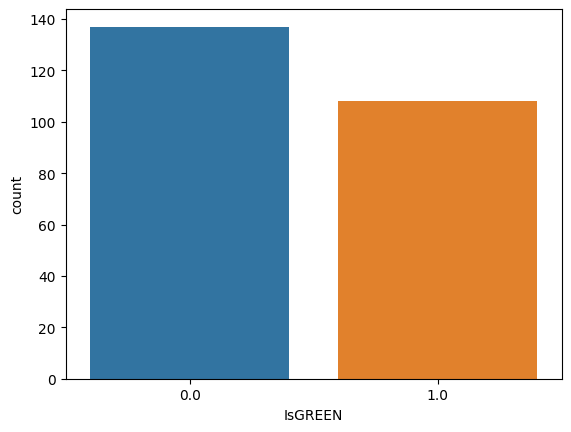

In [10]:
d = sns.countplot(x=filterd_df["IsGREEN"])


<Axes: xlabel='nine15TOLastRange'>

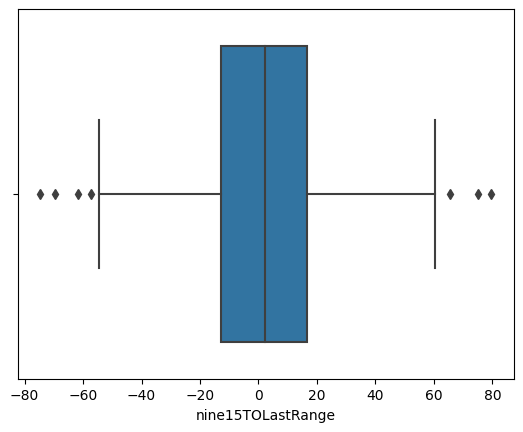

In [11]:
sns.boxplot(x=filterd_df["nine15TOLastRange"])

([<matplotlib.patches.Wedge at 0x7f9812caff40>,
 [Text(-0.20334766198104393, 1.081041039168654, '0.0'),
  Text(0.20334756076667618, -1.0810410582074315, '1.0')])

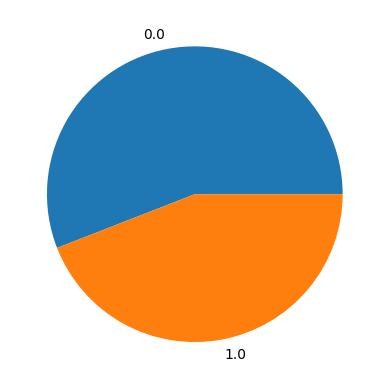

In [12]:
plt.pie(filterd_df["IsGREEN"].value_counts(),labels=filterd_df["IsGREEN"].value_counts().index)

<Axes: xlabel='nine15TOten15'>

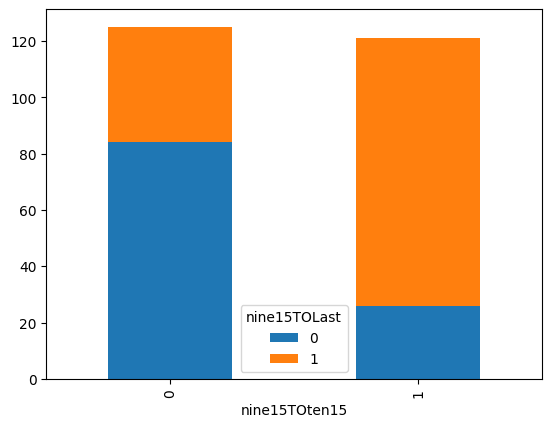

In [13]:
ct = pd.crosstab(filterd_df["nine15TOten15"],filterd_df["nine15TOLast"])
ct
ct.plot(kind="bar",stacked=True)
#nine15TOLast	ten15ToLast

In [14]:
correlation_matrix = filterd_df[["nine15TOten15","nine15TOLast","ten15ToLast"]].corr()
print(correlation_matrix)

               nine15TOten15  nine15TOLast  ten15ToLast
nine15TOten15       1.000000      0.459638     0.010047
nine15TOLast        0.459638      1.000000     0.547419
ten15ToLast         0.010047      0.547419     1.000000


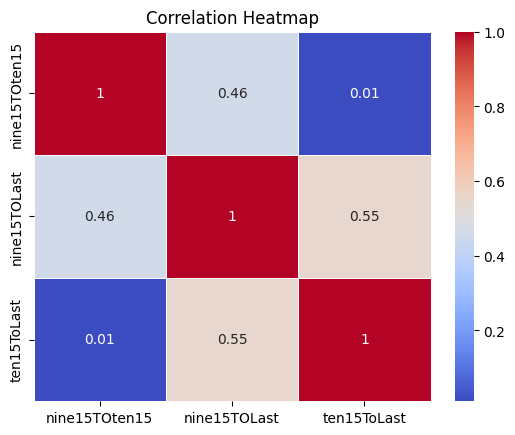

In [15]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation-Heatmap')
plt.show()